In [1]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
#from torchvision.datasets import MNIST

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import os
os.chdir("/content/drive/My Drive") 
import ra
import complexLayers


Dataset initialization

Train data

In [ ]:
dataset = ra.read('atoms.ra')
train_data = torch.tensor(dataset)

In [ ]:
import torch.utils.data as data

train_label = torch.tensor(ra.read('params.ra'))
train_label1 = train_label[0,:]
train_data =  torch.transpose(train_data, 0, 1)
train_dataset = data.TensorDataset(train_data,train_label1)

Test data

In [ ]:
testset = ra.read('atomsroa.ra')
test_data = torch.tensor(testset)
test_label = torch.tensor(ra.read('paramsroa.ra'))
test_label1 = test_label[0,:]
test_data =  torch.transpose(test_data, 0, 1)
test_dataset = data.TensorDataset(test_data,test_label1)

In [ ]:
trainloader = DataLoader(train_dataset, batch_size=128, shuffle=True)

In [ ]:
try: 
    import torchbearer
except:
    !pip install torchbearer

     |████████████████████████████████| 143kB 3.5MB/s 


In [ ]:
from torchbearer import Trial

In [ ]:
seed = 7
torch.manual_seed(seed)
trainloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=128, shuffle=True)


# build the model
model = BaselineModel()

# define the loss function and the optimiser
loss_function = nn.SmoothL1Loss()
optimiser = optim.Adam(model.parameters())

# the epoch loop
for epoch in range(100):
    running_loss = 0.0
    for data in trainloader:
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimiser.zero_grad()

        # forward + loss + backward + optimise (update weights)
        outputs = model(inputs.float())
        loss = loss_function(outputs, torch.Tensor(labels.float()))
        loss.backward()
        optimiser.step()

        # keep track of the loss this epoch
        running_loss += loss.item()
    print("Epoch %d, loss %4.2f" % (epoch, running_loss))
print('**** Finished Training ****')

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:813: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:813: UserWarning: Using a target size (torch.Size([24])) that is different to the input size (torch.Size([24, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction)


Epoch 0, loss 2022396.16
Epoch 1, loss 1925135.74
Epoch 2, loss 1828734.49
Epoch 3, loss 1734345.99
Epoch 4, loss 1641539.51
Epoch 5, loss 1550666.65
Epoch 6, loss 1463168.24
Epoch 7, loss 1378517.28
Epoch 8, loss 1297275.68
Epoch 9, loss 1220384.99
Epoch 10, loss 1147233.34
Epoch 11, loss 1079089.38
Epoch 12, loss 1015332.10
Epoch 13, loss 956839.33
Epoch 14, loss 903931.56
Epoch 15, loss 856664.00
Epoch 16, loss 815494.03
Epoch 17, loss 779779.55
Epoch 18, loss 750541.36
Epoch 19, loss 727305.95
Epoch 20, loss 709126.46
Epoch 21, loss 695938.86
Epoch 22, loss 687209.83
Epoch 23, loss 682061.56
Epoch 24, loss 679339.53
Epoch 25, loss 678233.71
Epoch 26, loss 677939.73
Epoch 27, loss 677747.11
Epoch 28, loss 677745.18
Epoch 29, loss 677726.47
Epoch 30, loss 677985.96
Epoch 31, loss 677878.15
Epoch 32, loss 677930.05
Epoch 33, loss 677974.37
Epoch 34, loss 677908.55
Epoch 35, loss 677923.28
Epoch 36, loss 677729.68
Epoch 37, loss 677730.71
Epoch 38, loss 677701.33
Epoch 39, loss 677771.

In [ ]:
from google.colab import files
files.download('BaselineModel.weights')

In [ ]:
model.eval()

BaselineModel(
  (fc1): Linear(in_features=1000, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=1, bias=True)
)

In [ ]:
i = 0
test_data = ra.read('atomsroa.ra')
test_label = ra.read('paramsroa.ra')
for i in range(100):
  test_data1 = torch.tensor(test_data[:,i]).to(device)
  predictions = model(test_data1.float())
  test_label1 = torch.tensor(test_label[:,i])
  print("predicted parameter:", predictions)
  print("setting parameter:", test_label1)


predicted parameter: tensor([2508.2239], grad_fn=<AddBackward0>)
setting parameter: tensor([100.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2508.2239], grad_fn=<AddBackward0>)
setting parameter: tensor([110.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2508.2239], grad_fn=<AddBackward0>)
setting parameter: tensor([120.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2508.2239], grad_fn=<AddBackward0>)
setting parameter: tensor([130.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2508.2239], grad_fn=<AddBackward0>)
setting parameter: tensor([140.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2508.2239], grad_fn=<AddBackward0>)
setting parameter: tensor([150.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2508.2239], grad_fn=<AddBackward0>)
setting parameter: tensor([160.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2508.2239], grad_fn=<AddBackward0>)
setting par

In [ ]:
#reset the data loaders
seed = 7
torch.manual_seed(seed)
trainloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=128, shuffle=True)

# build the model
model = BaselineModel()

# define the loss function and the optimiser
loss_function = nn.SmoothL1Loss()
optimiser = optim.Adam(model.parameters())

device = "cuda:0" if torch.cuda.is_available() else "cpu"
trial = Trial(model, optimiser, loss_function, metrics=['loss', 'accuracy']).to(device)
trial.with_generators(trainloader, test_generator=testloader)
trial.run(epochs=10)
results = trial.evaluate(data_key=torchbearer.TEST_DATA)
print(results)


AttributeError: ignored

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x = np.linspace(1, 1000, 1000)
(data.imag[:,172]).shape
x.shape
area=1

No handles with labels found to put in legend.


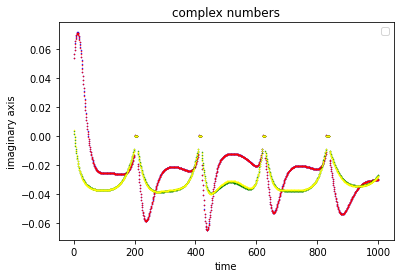

In [ ]:
#plt.scatter(data.real[:,172], data.imag[:,172], label="star", marker=".", color="green")
plt.scatter(x, data.imag[:,172], marker=".", color="blue",s=area)
plt.scatter(x, data.imag[:,171], marker=".", color="red",s=area)
plt.scatter(x, data.imag[:,0], marker=".", color="green",s=area)
plt.scatter(x, data.imag[:,1], marker=".", color="yellow",s=area)
plt.xlabel('time')
plt.ylabel('imaginary axis')
plt.title('complex numbers')
plt.legend()
plt.show()

In [ ]:
data1 = ra.read('params.ra')

In [ ]:
data1.real

array([[ 100.,  110.,  120., ..., 3980., 3990., 4000.],
       [  20.,   20.,   20., ..., 2000., 2000., 2000.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

In [ ]:
data1[1,:]

array([  20.,   20.,   20., ..., 2000., 2000., 2000.])

In [ ]:
label1=data1[0,:];
label2=data1[1,:];
label3=data1[2,:];

In [ ]:
print(label1)

[ 100.  110.  120. ... 3980. 3990. 4000.]


When developing, it is always a good idea to initialize the random number generator to a constant to ensure that the results of your script are reproducible each time you run it. Once the model is implemented and tested we might remove this to enable variance to be captured over multiple training runs.

In [ ]:
# fix random seed for reproducibility
seed = 7
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
import numpy as np
np.random.seed(seed)

In [ ]:
from complexLayers import ComplexBatchNorm2d, ComplexConv2d, ComplexLinear

In [ ]:
class BaselineModel1(nn.Module):
    
    def __init__(self):
        super(BaselineModel1,self).__init__()
        self.fc1 = ComplexLinear(1000, 512)
        self.fc1 = ComplexLinear(512, 256)
        self.fc3 = ComplexLinear(256, 1)
        self.bn1 = ComplexBatchNorm2d(128)
        self.bn2 = ComplexBatchNorm2d(128)
             
    def forward(self,x):
        xr = x.real
        xi = x.imag
        xr,xi = self.fc1(xr,xi)
        xr,xi = self.bn1(xr,xi)
        xr,xi = self.fc2(xr,xi)
        xr,xi = self.bn2(xr,xi)
        xr,xi = self.conv2(xr,xi)
        xr,xi = complex_relu(xr,xi)
        xr,xi = self.fc1(xr,xi)
        xr,xi = complex_relu(xr,xi)
        xr,xi = self.fc3(xr,xi)
        # take the absolute value as output
        x = torch.sqrt(torch.pow(xr,2)+torch.pow(xi,2))
        return F.log_softmax(x, dim=1)

In [ ]:
# build the model
model = BaselineModel1()

# define the loss function and the optimiser
loss_function = nn.SmoothL1Loss()
optimiser = optim.Adam(model.parameters())

# the epoch loop
for epoch in range(100):
    running_loss = 0.0
    for data in trainloader:
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimiser.zero_grad()

        # forward + loss + backward + optimise (update weights)
        outputs = model(inputs.float())
        loss = loss_function(outputs, torch.Tensor(labels.float()))
        loss.backward()
        optimiser.step()

        # keep track of the loss this epoch
        running_loss += loss.item()
    print("Epoch %d, loss %4.2f" % (epoch, running_loss))
print('**** Finished Training ****')

RuntimeError: ignored

In [10]:
def _batch_norm(x):
  eps_ = torch.finfo(torch.float32).eps
  y = (x - torch.mean(x)) / (torch.std(x) + eps_)
  return y


# define baseline model
class BaselineModel(nn.Module):
    def __init__(self):
        super(BaselineModel, self).__init__()
        self.fc1 = nn.Linear(1000, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 1)


    def forward(self, x):
        out = self.fc1(x)
        out = _batch_norm(out)
        out = torch.sigmoid(out)
        out = self.fc2(out)
        out = _batch_norm(out)
        out = torch.sigmoid(out)
        out = self.fc3(out)
        return out

In [ ]:
# build the model 
device = "cuda:0" if torch.cuda.is_available() else "cpu"
model = BaselineModel(1000, 512, 256).to(device)

# define the loss function and the optimiser
loss_function = nn.MSELoss()
optimiser = optim.Adam(model.parameters())

# the epoch loop
for epoch in range(10):
    running_loss = 0.0
    i = 0
    for i in range(data.shape[1]):
        # get the inputs
        
        #inputs = torch.tensor(data.imag[:,i]) #run imag part first since real data is 0
        #result:Expected object of scalar type Double but got scalar type Float for argument #3 'mat2' in call to _th_addmm_out
        inputs = torch.tensor(data[:,i]).to(device)
        labels = torch.tensor(label1[i]).to(device)

        # zero the parameter gradients
        optimiser.zero_grad()

        # forward + loss + backward + optimise (update weights)
        #print(inputs.float())

        outputs = model(inputs.float())
        loss = loss_function(outputs, torch.tensor(float(labels)))
        loss.backward()
        optimiser.step()

        # keep track of the loss this epoch
        running_loss += loss.item()
    print("Epoch %d, loss %4.2f" % (epoch, running_loss))
print('**** Finished Training ****')

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, loss 117511859965.79
Epoch 1, loss 92405531615.07
Epoch 2, loss 93088688022.30
Epoch 3, loss 92897486029.61
Epoch 4, loss 92851061828.14
Epoch 5, loss 92750755929.76
Epoch 6, loss 92692390157.46
Epoch 7, loss 92631273954.34
Epoch 8, loss 92559479402.21
Epoch 9, loss 92494858886.34
**** Finished Training ****


## Saving models

Being able to train a model is fine, but in practice once we've trained the model we probably want to save the result so we can reuse it at a later time. PyTorch makes saving the model easy using the torch.save(state, filepath) function. This will save the weights of the model so they can be loaded into a new instance at a later point.

Run the following code to save the weights for use in the next part of the lab.

In [ ]:
#save the trained model weights
torch.save(model.state_dict(), "./BaselineModel.weights")

If you are running on Colab, run the following to download the weights to the local machine:

In [ ]:
from google.colab import files
files.download('BaselineModel.weights')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
torch.save(model.state_dict(), 'checkpoint.pth')

# download checkpoint file
files.download('checkpoint.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
model = BaselineModel(1000, 512, 256).to(device)
model.load_state_dict(torch.load('BaselineModel.weights'))

<All keys matched successfully>

In [ ]:
model.eval()
i = 0
test_data = ra.read('atomsroa.ra')
test_label = ra.read('paramsroa.ra')
for i in range(100):
  test_data1 = torch.tensor(test_data[:,i]).to(device)
  predictions = model(test_data1.float())
  test_label1 = torch.tensor(test_label[:,i])
  print("predicted parameter:", predictions)
  print("setting parameter:", test_label1)


predicted parameter: tensor([2992.9651], grad_fn=<AddBackward0>)
setting parameter: tensor([100.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2992.9651], grad_fn=<AddBackward0>)
setting parameter: tensor([110.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2992.9651], grad_fn=<AddBackward0>)
setting parameter: tensor([120.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2992.9651], grad_fn=<AddBackward0>)
setting parameter: tensor([130.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2992.9651], grad_fn=<AddBackward0>)
setting parameter: tensor([140.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2992.9651], grad_fn=<AddBackward0>)
setting parameter: tensor([150.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2992.9651], grad_fn=<AddBackward0>)
setting parameter: tensor([160.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2992.9651], grad_fn=<AddBackward0>)
setting par

In [ ]:
model.eval()

# Compute the model accuracy on the test set
correct = 0
total = 0

# YOUR CODE HERE
raise NotImplementedError()

print('Test Accuracy: %2.2f %%' % ((100.0 * correct) / total))

In [ ]:
class Complexcard(nn.Module):
    def __init__(self):
        super(Complexcard, self).__init__()
        self.fc1 = nn.linear(1000, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 1)
        self.bn1 = nn.BatchNorm2d
        self.bn2 = nn.BatchNorm2d    
    def forward(self, x):
        out = self.fc1(x)
        out = self.bn1(x)
        out = F.sigmoid(out)
        out = self.fc2(out)
        out = self.bn2(x)
        out = F.sigmoid(out)
        out = self.fc3(out)
        return out
loss_function = nn.CrossEntropyLoss()

In [ ]:
class Complexsig(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn = nn.BatchNorm2d
        self.activation = nn.LogSigmoid
    def forward(self, x):
        x = x.view(-1,1,x.shape[0])
        x = (nn.Linear(x.shape[0],512))
        x = self.bn(x)
        x = activation(x)
        x = (nn.Linear(512,256))
        x = self.bn(x)
        x = activation(x)
        x = (nn.Linear(256,1))
        return x

If set the real part to zero

In [4]:
dataset = ra.read('atoms.ra')
train_data = torch.tensor(dataset)
train_data = train_data.imag

In [5]:
dataset = ra.read('atoms.ra')
train_data = torch.tensor(dataset)

In [8]:
import torch.utils.data as data

train_label = torch.tensor(ra.read('params.ra'))
train_label1 = train_label[0,:]
train_data =  torch.transpose(train_data, 0, 1)
train_dataset = data.TensorDataset(train_data,train_label1)

Test data

In [ ]:
testset = ra.read('atomsroa.ra')
test_data = torch.tensor(testset)
test_label = torch.tensor(ra.read('paramsroa.ra'))
test_label1 = test_label[0,:]
test_data =  torch.transpose(test_data, 0, 1)
test_dataset = data.TensorDataset(test_data,test_label1)

In [11]:
seed = 7
torch.manual_seed(seed)
trainloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
#testloader = DataLoader(test_dataset, batch_size=128, shuffle=True)


# build the model
model = BaselineModel()

# define the loss function and the optimiser
loss_function = nn.SmoothL1Loss()
optimiser = optim.Adam(model.parameters())

# the epoch loop
for epoch in range(100):
    running_loss = 0.0
    for data in trainloader:
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimiser.zero_grad()

        # forward + loss + backward + optimise (update weights)
        outputs = model(inputs.float())
        loss = loss_function(outputs, torch.Tensor(labels.float()))
        loss.backward()
        optimiser.step()

        # keep track of the loss this epoch
        running_loss += loss.item()
    print("Epoch %d, loss %4.2f" % (epoch, running_loss))
print('**** Finished Training ****')

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:813: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:813: UserWarning: Using a target size (torch.Size([24])) that is different to the input size (torch.Size([24, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction)


Epoch 0, loss 2022396.16
Epoch 1, loss 1925135.74
Epoch 2, loss 1828734.49
Epoch 3, loss 1734345.99
Epoch 4, loss 1641539.51
Epoch 5, loss 1550666.65
Epoch 6, loss 1463168.24
Epoch 7, loss 1378517.28
Epoch 8, loss 1297275.68
Epoch 9, loss 1220384.99
Epoch 10, loss 1147233.34
Epoch 11, loss 1079089.38
Epoch 12, loss 1015332.10
Epoch 13, loss 956839.33
Epoch 14, loss 903931.56
Epoch 15, loss 856664.00
Epoch 16, loss 815494.03
Epoch 17, loss 779779.55
Epoch 18, loss 750541.36
Epoch 19, loss 727305.95
Epoch 20, loss 709126.46
Epoch 21, loss 695938.86
Epoch 22, loss 687209.83
Epoch 23, loss 682061.56
Epoch 24, loss 679339.53
Epoch 25, loss 678233.71
Epoch 26, loss 677939.73
Epoch 27, loss 677747.11
Epoch 28, loss 677745.18
Epoch 29, loss 677726.47
Epoch 30, loss 677985.96
Epoch 31, loss 677878.15
Epoch 32, loss 677930.05
Epoch 33, loss 677974.37
Epoch 34, loss 677908.55
Epoch 35, loss 677923.28
Epoch 36, loss 677729.68
Epoch 37, loss 677730.71
Epoch 38, loss 677701.33
Epoch 39, loss 677771.

In [13]:
model.eval()
i = 0
test_data = ra.read('atomsroa.ra')
test_label = ra.read('paramsroa.ra')
for i in range(100):
  test_data1 = torch.tensor(test_data[:,i])
  predictions = model(test_data1.float())
  test_label1 = torch.tensor(test_label[:,i])
  print("predicted parameter:", predictions)
  print("setting parameter:", test_label1)

predicted parameter: tensor([2508.2239], grad_fn=<AddBackward0>)
setting parameter: tensor([100.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2508.2239], grad_fn=<AddBackward0>)
setting parameter: tensor([110.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2508.2239], grad_fn=<AddBackward0>)
setting parameter: tensor([120.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2508.2239], grad_fn=<AddBackward0>)
setting parameter: tensor([130.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2508.2239], grad_fn=<AddBackward0>)
setting parameter: tensor([140.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2508.2239], grad_fn=<AddBackward0>)
setting parameter: tensor([150.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2508.2239], grad_fn=<AddBackward0>)
setting parameter: tensor([160.,  20.,   0.], dtype=torch.float64)
predicted parameter: tensor([2508.2239], grad_fn=<AddBackward0>)
setting par

In [14]:
for param in model.parameters():
  print(param.data)

tensor([[ 0.0022, -0.0190,  0.0101,  ..., -0.0160, -0.0058,  0.0304],
        [ 0.0280,  0.0162, -0.0149,  ..., -0.0258, -0.0183,  0.0006],
        [-0.0032,  0.0069,  0.0123,  ..., -0.0170, -0.0314,  0.0168],
        ...,
        [ 0.0210, -0.0096,  0.0019,  ..., -0.0288,  0.0015, -0.0260],
        [ 0.0172,  0.0048, -0.0126,  ...,  0.0291, -0.0085, -0.0152],
        [-0.0011,  0.0265,  0.0007,  ..., -0.0177,  0.0052,  0.0150]])
tensor([ 1.3176e-01, -1.6505e-01, -1.8335e-01,  1.4977e-01,  5.3468e-02,
         3.1411e-01,  5.6621e-01, -1.3339e-02, -4.9284e-02,  4.7443e-01,
        -1.0569e-02,  2.0607e-02, -1.0076e-01,  1.4511e-01,  2.8492e-01,
        -1.3758e-01,  3.6764e-01,  2.0254e-01,  4.6537e-01, -8.2923e-02,
         4.6460e-01,  5.4099e-01, -3.0317e-01, -2.1549e-01, -2.2509e-01,
        -1.5506e-01, -1.0876e-01,  3.2170e-01,  1.2305e-01, -3.0932e-01,
        -1.2955e-01,  6.4036e-01,  1.5676e-01, -2.4657e-01,  1.1528e-01,
        -1.2204e-01,  5.5772e-02, -1.2193e-01,  9.6900e